<a href="https://colab.research.google.com/github/annisakrnn/Machine-Learning_2025/blob/main/03_UTS_ML_Annisa_Kurniawati_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Machine Learning

Nama: Annisa Kurniawati

Absen: 03

Kelas: TI/3H

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Library

In [ ]:
!pip install annoy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp312-cp312-linux_x86_64.whl size=551812 sha256=7da46c485bd21631d449bfa78f541ef6792613515557d244abb49bf32ace03fe
  Stored in directory: /root/.cache/pip/wheels/db/b9/53/a3b2d1fe1743abadddec6aa541294b24fdbc39d7800bc57311
Successfully built annoy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns

Memuat Data

In [ ]:
df = pd.read_csv('heart.csv')

**Preprocessing Data**

Cek Tipe Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Cek Data

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Cek 5 Data Pertama

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Cek Missing Value

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Normalisasi

In [ ]:
# Normalisasi
scaler = StandardScaler()
columns_to_scale = ['age', 'fbs', 'chol', 'thalach', 'exang']

# Fit dan transform
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Tampilkan ringkasan setelah normalisasi
print("\nRingkasan statistik setelah normalisasi:")
print(df[columns_to_scale].describe())


Ringkasan statistik setelah normalisasi:
                age           fbs          chol       thalach         exang
count  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03  1.025000e+03
mean  -3.431402e-16 -4.159275e-17 -3.466062e-18 -4.332578e-16 -7.625337e-17
std    1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00  1.000488e+00
min   -2.804866e+00 -4.188779e-01 -2.327054e+00 -3.397080e+00 -7.122871e-01
25%   -7.095548e-01 -4.188779e-01 -6.787242e-01 -7.442713e-01 -7.122871e-01
50%    1.726817e-01 -4.188779e-01 -1.163527e-01  1.255019e-01 -7.122871e-01
75%    7.240794e-01 -4.188779e-01  5.623715e-01  7.343432e-01  1.403928e+00
max    2.488552e+00  2.387330e+00  6.166694e+00  2.299935e+00  1.403928e+00


Fitur baru hasil kombinasi fitur lama

**1. Skor resiko hipertensi atau hipertensi_risk**

Fitur ini adalah gabungan dari fiturage dan trestbps atau tekanan darah saat istrahat

**2. Skor resiko kardiac atau cardiac_risk_score**

Fitur ini adalah gabungan dari fitur chol/kolestrol, fbs/gula darah, dan exang/angin saat olahraga. Fitur ini bisa digunakan untuk mengidentifikasi pasien berisiko tinggi penyakit jantung karena faktor angin saat olahraga, kolestrol, dan gula darah

In [ ]:
# Buat fitur baru
df['hipertensi_risk'] = (df['age'] + df['trestbps']) / 2
df['cardiac_risk_score'] = df['chol'] + df['fbs'] + df['exang']

# Tampilkan hasil
print("Distribusi hipertensi_risk:\n", df['hipertensi_risk'].describe())
print("\nDistribusi cardiac_risk_score:\n", df['cardiac_risk_score'].describe())
print("\nContoh 5 baris:\n", df[['age', 'trestbps', 'chol', 'fbs', 'exang', 'hipertensi_risk', 'cardiac_risk_score']].head())

# Simpan
df.to_csv('heart_with_risk_features.csv', index=False)

Distribusi hipertensi_risk:
 count    1025.000000
mean       65.805854
std         8.907010
min        46.148965
25%        59.755502
50%        64.810642
75%        70.306900
max       100.086341
Name: hipertensi_risk, dtype: float64

Distribusi cardiac_risk_score:
 count    1.025000e+03
mean    -4.159275e-17
std      1.813927e+00
min     -3.167338e+00
25%     -1.441439e+00
50%     -3.530060e-01
75%      1.159579e+00
max      5.633510e+00
Name: cardiac_risk_score, dtype: float64

Contoh 5 baris:
         age  trestbps      chol       fbs     exang  hipertensi_risk  \
0 -0.268437       125 -0.659332 -0.418878 -0.712287        62.365782   
1 -0.158157       140 -0.833861  2.387330  1.403928        69.920921   
2  1.716595       145 -1.396233 -0.418878  1.403928        73.358298   
3  0.724079       148 -0.833861 -0.418878 -0.712287        74.362040   
4  0.834359       138  0.930822  2.387330 -0.712287        69.417180   

   cardiac_risk_score  
0           -1.790497  
1            2.9

Membaca data

In [ ]:
df.to_csv('heart_updated.csv', index=False)

Analisis korelasi antar fitur untuk clustering K-Means dan DBSCAN
Saya memilih fitur age dan oldpeak karena dari heatmap menunjukkan adanya korelasi saat umur (age) meningkat maka depresi saat latihan (oldpeak) juga meningkat. Selain itu age dan oldpeak memiliki hubungan terkait fungsi jantung


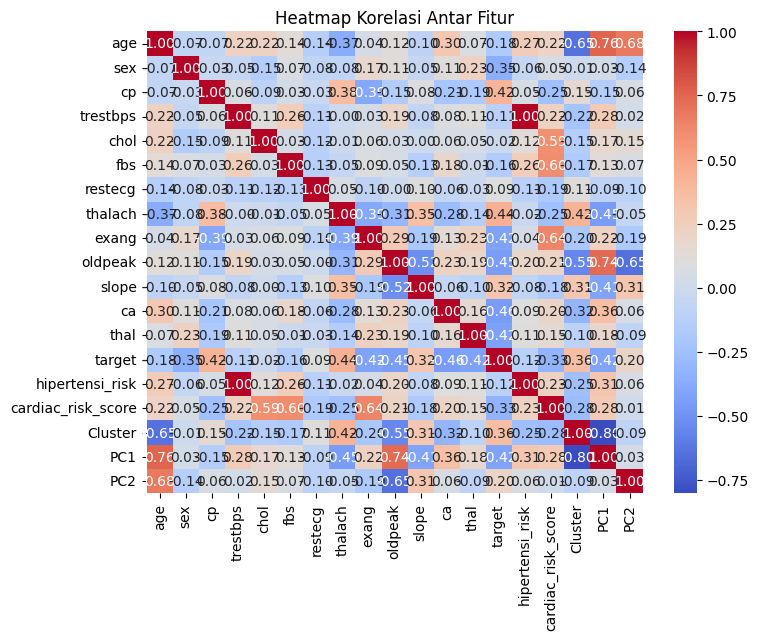


 Variansi Fitur (semakin besar = semakin beragam):
trestbps              321.136944
hipertensi_risk        82.599563
cardiac_risk_score      3.270038
oldpeak                 1.410438
PC1                     1.174314
cp                      1.164839
age                     1.083889
ca                      1.053261
exang                   1.011499
thalach                 1.004968
chol                    0.963583
fbs                     0.938010
PC2                     0.932074
slope                   0.392868
thal                    0.364884
restecg                 0.289145
target                  0.251049
Cluster                 0.249154
sex                     0.206500
dtype: float64


In [ ]:
# num_df: Fitur numerik
num_df = df.select_dtypes(include=[np.number])

# Analisis Korelasi Fitur
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

# Analisis Variansi Fitur
variances = num_df.var().sort_values(ascending=False)
print("\n Variansi Fitur (semakin besar = semakin beragam):")
print(variances)

# Melihat korelasi tinggi (redundan)
corr_matrix = num_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.8)]


DBSCAN

Persiapan Data

In [ ]:
X = df[['age', 'oldpeak']].values

Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.26843658 -0.06088839]
 [-0.15815703  1.72713707]
 [ 1.71659547  1.30141672]
 ...
 [-0.81983438 -0.06088839]
 [-0.4889957  -0.91232909]
 [-0.04787747  0.27968789]]


Algortitma DBSCAN & Visualisasi

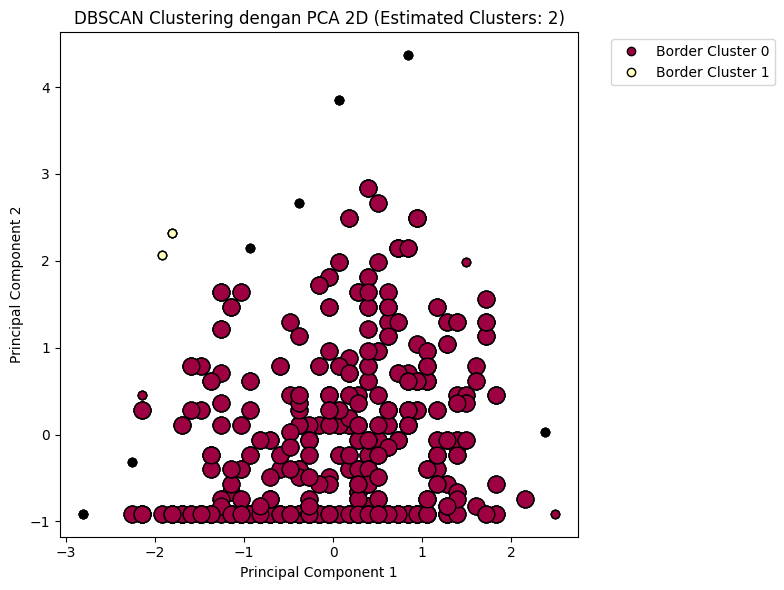

Jumlah cluster: 2
Jumlah noise points: 23
Explained variance ratio by PCA: [0.60406834 0.39593166]
Total explained variance: 100.00%


In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

labels = dbscan.labels_

# Mask core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Warna untuk setiap cluster
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]


# Plot cluster
plt.figure(figsize=(8, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna hitam untuk titik yang dianggap noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Titik core cluster
    xy_core = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(
        xy_core[:, 0], xy_core[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=12,
    )

    # Titik non-core cluster
    xy_non_core = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy_non_core[:, 0], xy_non_core[:, 1], "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
        label=f"Border Cluster {k}" if k != -1 and len(xy_non_core) > 0 else ""
    )

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
plt.title(f"DBSCAN Clustering dengan PCA 2D (Estimated Clusters: {n_clusters_})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Informasi tambahan
print(f"Jumlah cluster: {n_clusters_}")
print(f"Jumlah noise points: {list(labels).count(-1)}")
print(f"Explained variance ratio by PCA: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.2%}")

K-Means

Persiapan Data

In [ ]:
X = df[['age', 'oldpeak']].values

Normalisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.26843658 -0.06088839]
 [-0.15815703  1.72713707]
 [ 1.71659547  1.30141672]
 ...
 [-0.81983438 -0.06088839]
 [-0.4889957  -0.91232909]
 [-0.04787747  0.27968789]]


Menentukan jumlah cluster optimal dengan (elbow method)

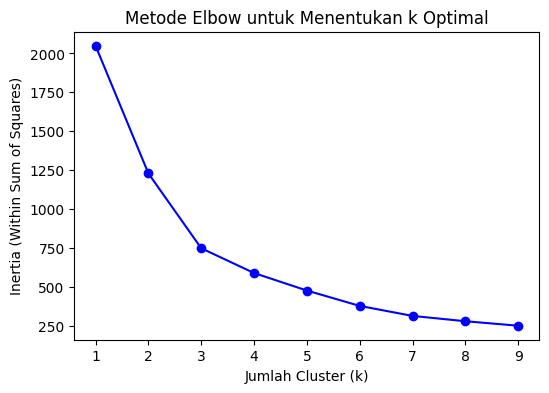

In [ ]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, "bo-")
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (Within Sum of Squares)")
plt.title("Metode Elbow untuk Menentukan k Optimal")
plt.show()

Menerapkan K-Means dan visualisai

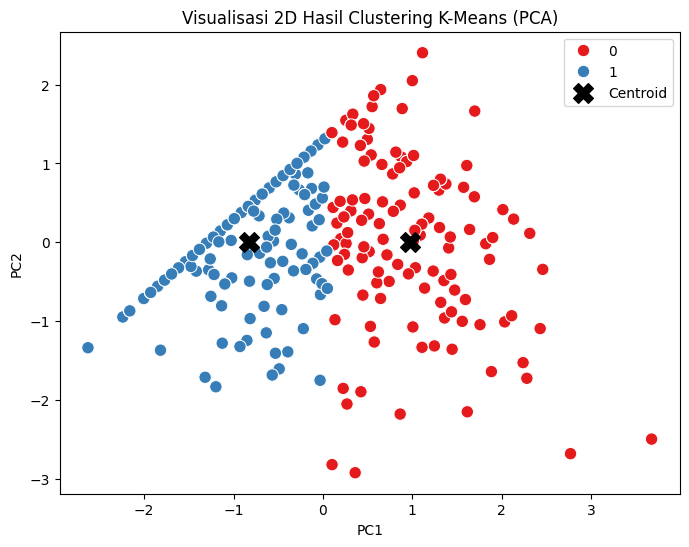

In [ ]:
# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# PCA untuk visualisasi 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tambahkan hasil PCA ke dataframe
df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set1",
    s=80
)

# Plot centroid
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c="black",
    marker="X",
    s=200,
    label="Centroid"
)

plt.title("Visualisasi 2D Hasil Clustering K-Means (PCA)")
plt.legend()
plt.show()


Ringkasan Hasil

In [ ]:
print("Jumlah anggota tiap cluster:")
print(df["Cluster"].value_counts())

Jumlah anggota tiap cluster:
Cluster
1    556
0    469
Name: count, dtype: int64


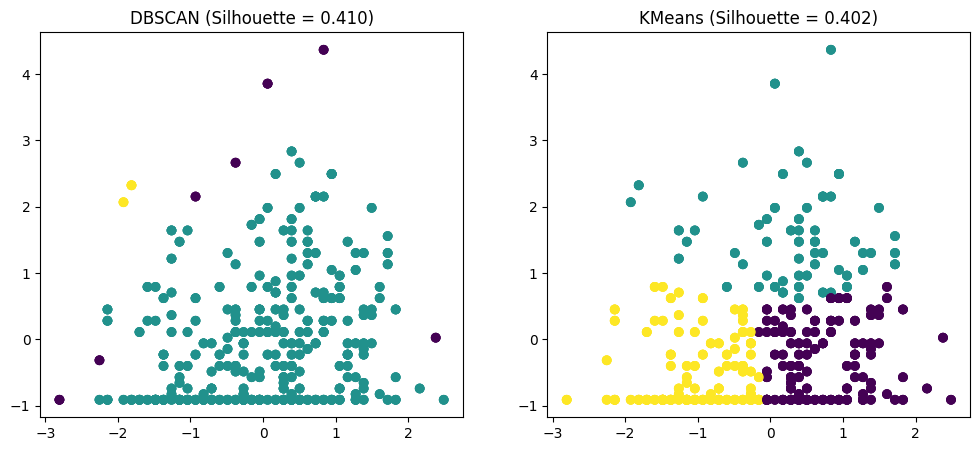

In [ ]:
# Silhouette Score untuk DBSCAN
if len(np.unique(labels_dbscan)) > 1:
    s_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    s_dbscan = -1

# Silhouette Score untuk KMeans
s_kmeans = silhouette_score(X_scaled, labels_kmeans)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot DBSCAN
ax[0].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_dbscan, cmap='viridis')
ax[0].set_title(f'DBSCAN (Silhouette = {s_dbscan:.3f})')

# Plot KMeans
ax[1].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans, cmap='viridis')
ax[1].set_title(f'KMeans (Silhouette = {s_kmeans:.3f})')

plt.show()

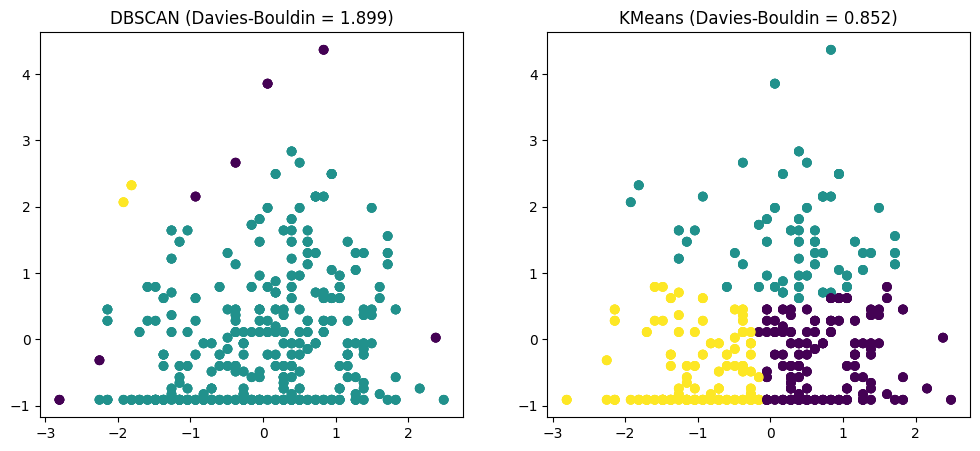

In [ ]:
# Hitung Davies-Bouldin Score untuk DBSCAN
db_dbscan = davies_bouldin_score(X_scaled, labels_dbscan)

# Hitung Davies-Bouldin Score untuk KMeans
db_kmeans = davies_bouldin_score(X_scaled, labels_kmeans)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot DBSCAN
ax[0].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_dbscan, cmap='viridis')
ax[0].set_title(f'DBSCAN (Davies-Bouldin = {db_dbscan:.3f})')

# Plot KMeans
ax[1].scatter(X_scaled[:,0], X_scaled[:,1], c=labels_kmeans, cmap='viridis')
ax[1].set_title(f'KMeans (Davies-Bouldin = {db_kmeans:.3f})')

plt.show()

ANN (Approximate Nearest )

Persiapan Data

In [ ]:
X = df[['age', 'oldpeak']].values

Normalisas Data

In [ ]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
print(X_scaled)

[[-0.26843658 -0.06088839]
 [-0.15815703  1.72713707]
 [ 1.71659547  1.30141672]
 ...
 [-0.81983438 -0.06088839]
 [-0.4889957  -0.91232909]
 [-0.04787747  0.27968789]]


Hapus duplikasi data

In [ ]:
df = df.drop_duplicates(subset=['age', 'oldpeak'])

Penerapan algoritma ANN

Analisis dan implementasi menggunakan algoritma Annoy
Untuk pemilihan 3 query secara acak efektif untuk sampling representatif. Query 1 dan 3 mempunyai oldpeak resiko rendah (resiko jantung rendah) dan query 2 oldpeak mempunyai resiko sedang. Ini mencakup variasi usia muda hingga tua.
Untuk output index dan tetangga terdekat dengan nilai jaraknya menunjukkan semua tetangga yang valid 5 index, misalnya query 1 mirip pasien 104 dan 128 (duplikat data). Ini menunjukkan annoy akurat dalam idexing. Nilai jarak = 0.000 artinya jarak euclidean sempurna. Karena dataset lebih ramping.


In [ ]:
# Import tambahan jika belum
from annoy import AnnoyIndex

# Pemilihan 3 titik query secara acak (3-5, seed untuk konsistensi)
random.seed(42)
query_indices = random.sample(range(len(X_scaled)), 3)
query_points = X_scaled[query_indices]

print("Query Points Dipilih (Index & Koordinat Scaled):")
for i, idx in enumerate(query_indices):
    print(f"Query {i+1}: Index {idx}, Point: {query_points[i]}")

# Bangun Annoy Index
n_features = X_scaled.shape[1]  # \
n_trees = 10  # Jumlah tree (trade-off akurasi vs kecepatan)
annoy_index = AnnoyIndex(n_features, 'euclidean')

# Tambah semua points ke index
for i in range(len(X_scaled)):
    annoy_index.add_item(i, X_scaled[i])

# Build index
annoy_index.build(n_trees)
print(f"\nIndex Annoy dibangun dengan {n_trees} trees.")

# Query tetangga terdekat (5 per query)
n_neighbors = 5
print("\n=== Output: Index dan Tetangga Terdekat dengan Jarak ===")
for i, (q_idx, q_pt) in enumerate(zip(query_indices, query_points)):
    neighbors, distances = annoy_index.get_nns_by_vector(q_pt, n_neighbors, include_distances=True)

    print(f"\nQuery {i+1} (Index: {q_idx})")
    print("Tetangga Terdekat (Index):", neighbors)
    print("Jarak (Euclidean, scaled):", [f"{d:.4f}" for d in distances])

Query Points Dipilih (Index & Koordinat Scaled):
Query 1: Index 228, Point: [-0.26843658 -0.91232909]
Query 2: Index 51, Point: [ 0.28296121 -0.74204095]
Query 3: Index 563, Point: [-1.15067305 -0.91232909]

Index Annoy dibangun dengan 10 trees.

=== Output: Index dan Tetangga Terdekat dengan Jarak ===

Query 1 (Index: 228)
Tetangga Terdekat (Index): [104, 128, 228, 290, 379]
Jarak (Euclidean, scaled): ['0.0000', '0.0000', '0.0000', '0.0000', '0.0000']

Query 2 (Index: 51)
Tetangga Terdekat (Index): [51, 101, 336, 475, 940]
Jarak (Euclidean, scaled): ['0.0000', '0.0000', '0.0000', '0.0000', '0.0000']

Query 3 (Index: 563)
Tetangga Terdekat (Index): [85, 110, 178, 245, 260]
Jarak (Euclidean, scaled): ['0.0000', '0.0000', '0.0000', '0.0000', '0.0000']


**Analisis dan Kesimpulan**

- Perbedaan hasil K-Means dan DBSCAN menunjukkan bahwa K-Means dengan k=2 berdasarkan yang didapatkan dari metode elbow tanpa noise dengan anggota 469 dan 556 dengan asumsi cluster, sehingga semua data dipaksa masuk ke centroid, DBSAN dengan eps=0,5 dan min_samples=5 juka 2 cluster namun dengan 23 noise, lebih flesibel untuk cluster dan mengidentifikasi data tidak padat. Oleh karena itu metode DBSCAN lebih baik untuk dataset ini, karena data heart dengan fitur heart dan oldpeak cenderung elongated dari scatter plot. Sehingga DBSCAN tangani outlier dan menghasilkan pemisahan alami untuk segmentasi resiko jantung.

- Nilai metrik terbaik untuk s-score yang terbaik adalah DBSCAN dengan jumlah 0,410 dan untuk davies-bouldin index yang terbaik K-Means adalah 1,07 maka pemisahan lebih optimal dibanding DBSCAN 1,899

- Untuk hasil cluster tetangga termasuk dalam cluster yang sama dikarenakan mayoritas tetangga termasuk cluster cluster yang sama dengan query point.

- Hasil analisis fitur age dan oldpeak berdasarkan algoritma K-Means menunjukkan bahwa s-score 0,402 dan davies-bouldin score menunjukkan 0,852. Ini menunjukkan bahwa cluster yang kohesif sedang, dimana data dalam clustur relatif mirio satu sama lain dan pemisahan clustur cukup baik.

- Hasil analisis fitur age dan oldpeak berdasarkan algoritma DBSCAN menunjukkan bahwa s-score 0,410 dan davies-boludin score 1,899. Ini menunjukkan bahwa kohesi ebih baik dan menunjukkan struktur cluster lebih kohesif dan adaptif terhadap bentuk data.